# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Data

In [2]:
df = pd.read_excel("cancer_patients.xlsx", sheet_name = "Sheet1")

In [3]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


**This Dataset contains 23 features in total (excluding patient id and target variable)**<br>
* It has features like air pllution exposure, dust allergy severeness, Genetic Risks etc.<br>
* From the metadata found on **data.world** we could see that only the age variable is a continuous variable, while the rest of the features are discrete numerical variables, and also 1 categorical variable that is our target variable i.e. level

In [4]:
df.shape

(1000, 25)

**This dataset contains a total of 1000 unique records of patients**

In [5]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

**There are no missing values in the data set**

In [6]:
df.dtypes

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

**The data types of all the columns are correct**

**Let us now clean the dataset a little and move to Exploratory Data Analysis**

In [7]:
df.rename(columns = {'Patient Id' : 'p_id' , 'Age' : 'age', 'Gender' : 'gender', 'Air Pollution' :'air_poll' , 
                     'Alcohol use' : 'alc_use','Dust Allergy' : 'dust_al', 'OccuPational Hazards': 'occ_hazard', 
                     'Genetic Risk' : 'gen_risk','chronic Lung Disease': 'lung_disease', 'Balanced Diet': 'balanced_diet', 
                     'Obesity' : 'obesity', 'Smoking' : 'smoking', 'Passive Smoker' : 'passive_smoker', 'Chest Pain' : 'chest_pain',
                     'Coughing of Blood' : 'cough_blood', 'Fatigue' : 'fatigue','Weight Loss' : 'weight_loss', 
                     'Shortness of Breath' : 'short_breath', 'Wheezing' : 'wheezing','Swallowing Difficulty' : 'swallowing_difficulty',
                     'Clubbing of Finger Nails' : 'clubbing_nails', 'Frequent Cold' : 'frequent_cold','Dry Cough' : 'dry_cough', 
                     'Snoring' : 'snoring', 'Level' : 'level'}, inplace = True)

# Exploratory Data Analysis

### Univariate analysis

In [8]:
def univariate_kde(df, column):
    '''
    Calculates the descriptives and displays a kdeplot to observe distribution of data.
    '''
    plt.figure(figsize = (7 , 5))
    
    # Descriptives
    mini = df[column].min()
    maxi = df[column].max()
    mean = df[column].mean()
    std = df[column].std()
    std_points = (mean - std, mean + std)
    ran = (mini, maxi)
    
    #plot
    sns.kdeplot(df[column],shade = True, label = 'distribution')
    sns.lineplot(std_points, [0, 0],linewidth = 3, color = 'black',label = 'std_dev')
    sns.scatterplot(mean, [0], label = 'mean', s = 75)
    sns.scatterplot(mini, [0], label = 'min', s = 75)
    plt.xlabel('{}'.format(column))
    plt.ylabel('Count')
    plt.title('mean = {}, range = {};\nstd_dev = {};'.format(round(mean, 2), (round(ran[0], 2), round(ran[1], 2)),
                                                            (round(std_points[0], 2), round(std_points[1], 2))))

In [9]:
def univariate_countplot(df, columns):
    '''
    Displays the descriptives and also the barplot of discrete variables
    '''
    size = len(columns)
    plt.figure(figsize = (size * 7, 5))
    for i, column in enumerate(columns):
        # Descriptives
        mini = df[column].min()
        maxi = df[column].max()
        mean = df[column].mean()
        std = df[column].std()
        std_points = (mean - std, mean + std)
        ran = (mini, maxi)
    
        #plot
    
        plt.subplot(1, size, i + 1)
        sns.countplot(df[column])
        plt.xlabel('{}'.format(column))
        plt.ylabel('Count')
        plt.title('mean = {}, range = {};\nstd_dev = {};'.format(round(mean, 2), (round(ran[0], 2), round(ran[1], 2)),
                                                            (round(std_points[0], 2), round(std_points[1], 2))))
    return plt.show()
    

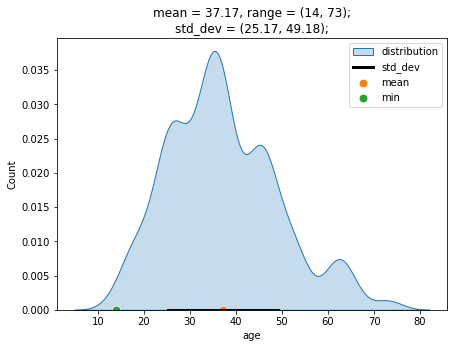

In [10]:
univariate_kde(df, 'age')

**Insights :**
* The mean age of patients is 37 years.
* The youngest patient in our dataset is 14 years old, while the oldest person is 73.
* The range of ages included in the first standard deviation is 25 to 49 years.

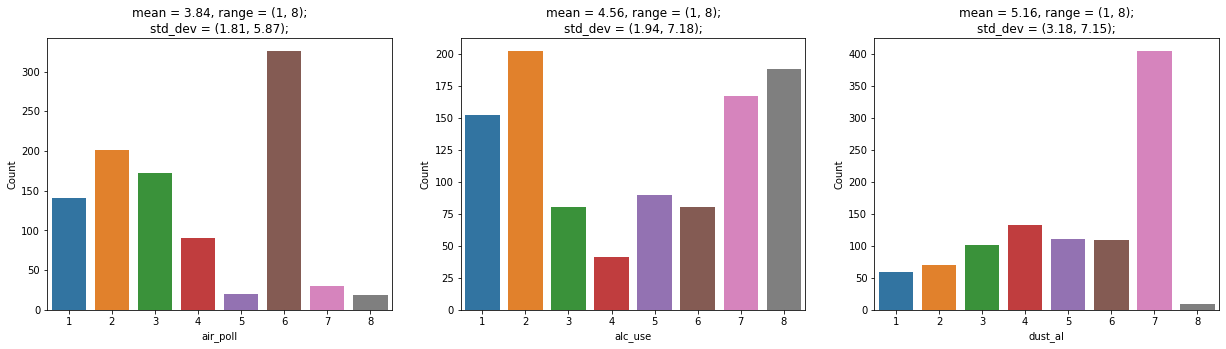

In [11]:
univariate_countplot(df, ['air_poll', 'alc_use', 'dust_al'])

**Insights :**
* More people are exposed to level 6 air pollution.
* The mean is between 3 and 4 level of air pollution.
* Many people drink alcohol frequently as is evident by the mean if 4.5 alcohol use.
* A lot of people are allergic to dust, as we can see in the third graph.

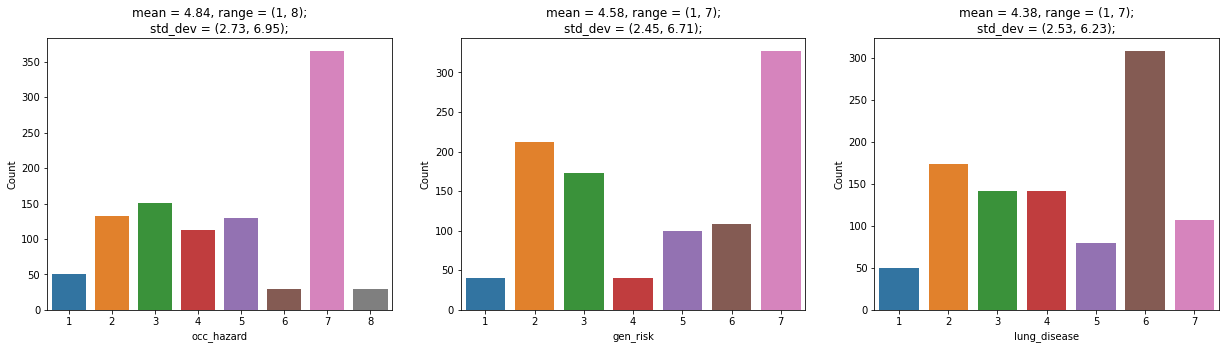

In [12]:
univariate_countplot(df, ['occ_hazard','gen_risk', 'lung_disease'])

**Insights :**
* A lot of people are working in hazardous conditions, as we can see that the peak number is 7, and aslo the average is almost 5
* Many people are at a higher level of genetic risk of getting cancer as well.
* Many people suffer from chronic lung diseases

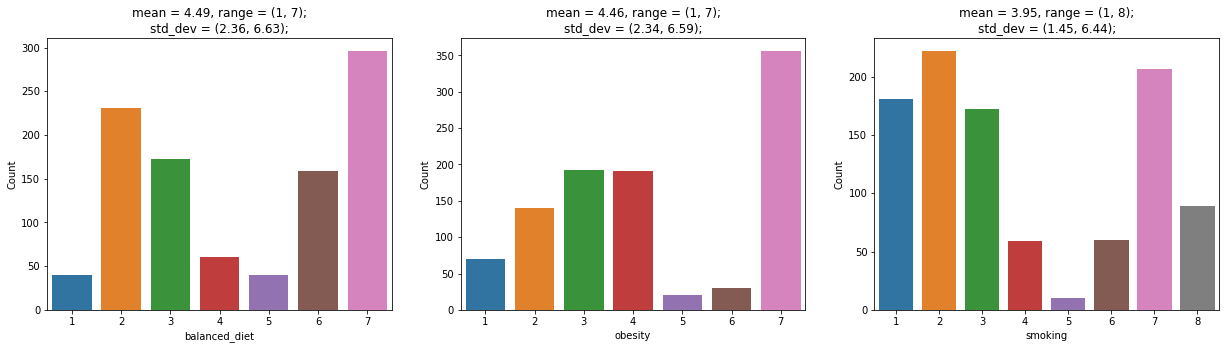

In [13]:
univariate_countplot(df, ['balanced_diet', 'obesity', 'smoking'])

**Insights :**
* A lot of people have a balanced diet, with the average being = 4.5
* Many people suffer from obesity.
* There are people with pretty low level of smoking but there are some with high smoking as well

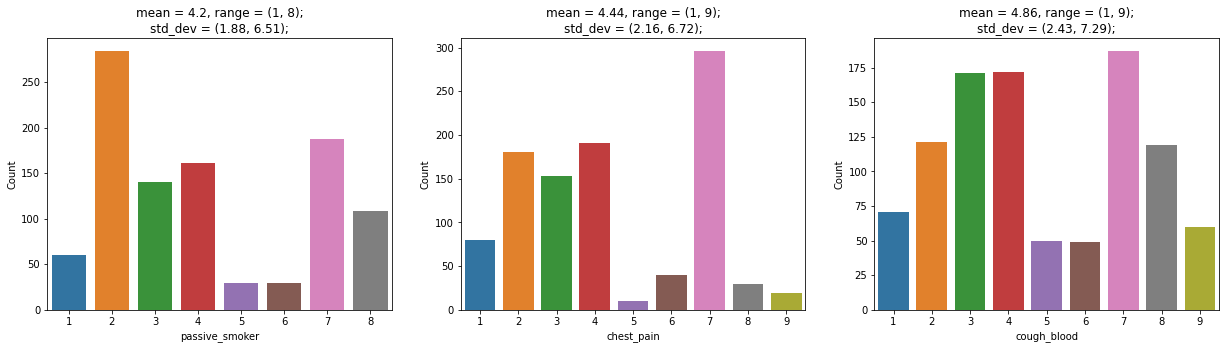

In [14]:
univariate_countplot(df, ['passive_smoker', 'chest_pain', 'cough_blood'])

**Insights :**
* The peak of passive smoking is at 2 which means they aren't around smoke often, but the mean is 4.2 which means there are some people in the sample who are at high levels of passive smoking
* A lot of people experience chest pain, as we can see from the peek that is at 7.
* Many people seem to be coughing blood as we can see from the peek which is at 7, while the average is at around 5.

<AxesSubplot:xlabel='level', ylabel='count'>

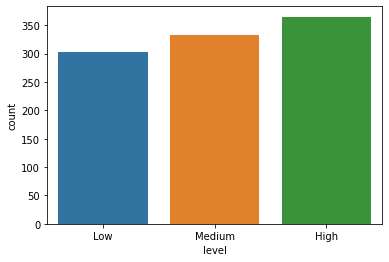

In [15]:
sns.countplot('level', data = df)

**Insights :**
* The dataset is pretty much balanced , with the number of patients in all classes being very close between 300 and 350

### Bivariate Analysis

In [16]:
def bivariate_countplot(df, x_var, hue_var):
    '''
    df -> data
    x_var -> discrete value
    hue_var -> categorical variable
    '''
    size = len(x_var)
    plt.figure(figsize = (size * 7, 7))
    for i, x in enumerate(x_var):
        plt.subplot(1, size, i + 1)
        sns.countplot(x, hue = hue_var, data = df)
        

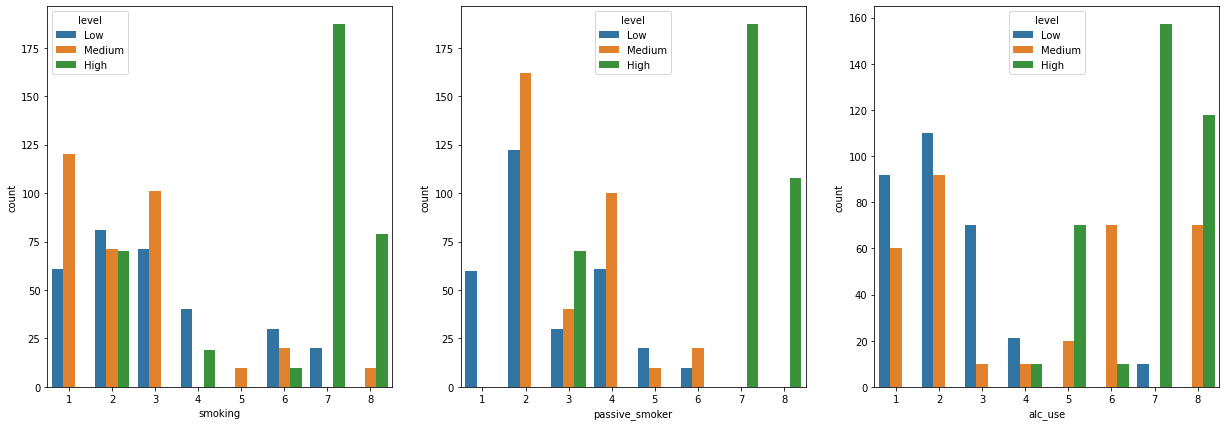

In [17]:
bivariate_countplot(df, ['smoking', 'passive_smoker', 'alc_use'], 'level')

**Insights :**
* Here we can see that those who smoke more or are passive smokers, they are at higher risks of getting cancer.
* The data proves that smoking and alcohol consumption leads to a higher risk of cancer.

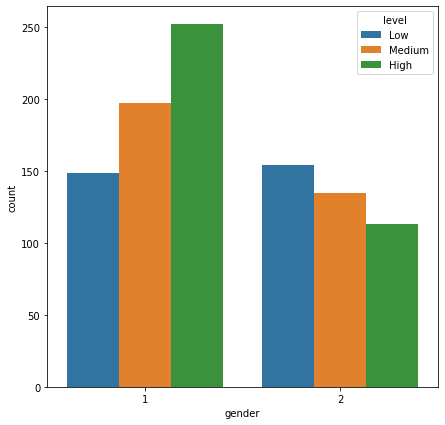

In [18]:
bivariate_countplot(df, ['gender'], 'level')

**Insights :**
* Here we can see that females are at a relatively lower risk of getting cancer.
* We will now check why this is the case

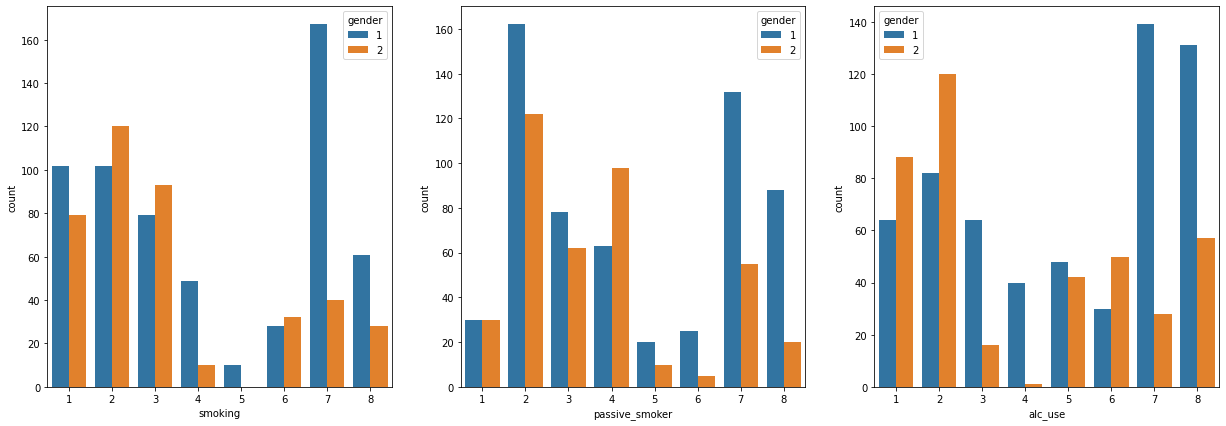

In [19]:
bivariate_countplot(df, ['smoking', 'passive_smoker', 'alc_use'], 'gender')

**Insights :**
* Here we see that females are much less passive smokers , smokers and alcohol users as compared to men (ACCORDING TO THIS DATASET).
* Maybe this is the reason why women are less likely to get cancer as compared to men.

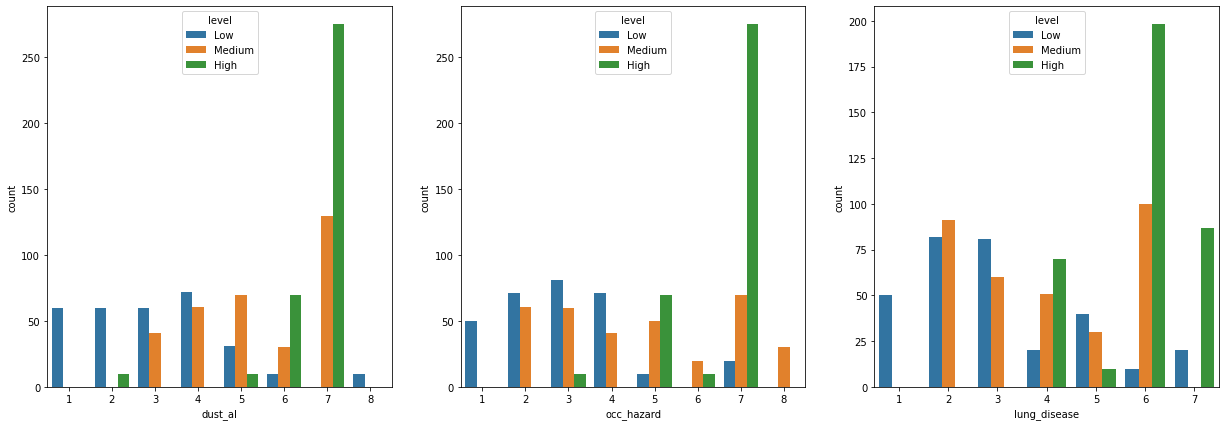

In [20]:
bivariate_countplot(df, ['dust_al', 'occ_hazard', 'lung_disease'], 'level')

**Insights :**
* Here we can notice a very evident pattern, that people with higher levels of dust alergies, occupational hazards and chronic diseases are at a much higher level of getting cancer.

### SUMMARY OF EDA

<hr>

* The **mean age** of patients is **37 years**.
* More patients are exposed to **level 6 air pollution**.
* Many patients **drink alcohol frequently**.
* A lot of patients are **allergic** to **dust**.
* A lot of patients are working in **hazardous conditions**.
* A lot of patients experience chest pain.
* Those who smoke more or are passive smokers, they are at higher risks of getting cancer.
* From the **visualizations we can prove that smoking and alcohol consumption** leads to a **higher risk of cancer**.
* Females are much less passive smokers , smokers and alcohol users as compared to men (ACCORDING TO THIS DATASET).
* Patients with higher levels of dust alergies, occupational hazards and chronic diseases are at a much higher risk of getting cancer.

<hr>

## Preprocessing

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(['level', 'p_id'], axis = 1)
Y = df['level']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25)

* Here we have split the data into training and testing set

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(Xtrain)
Xtest_scaled = sc.transform(Xtest)

* Here we have scaled the data to be between 0 and 1.

## Machine Learning Model Selection

### Support vector machine

In [39]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain, Ytrain)
Ypred = svc.predict(Xtest)

In [40]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Ytest, Ypred))
print('ACCURACY = :', accuracy_score(Ytest, Ypred))

              precision    recall  f1-score   support

        High       0.99      1.00      0.99        85
         Low       1.00      0.95      0.98        85
      Medium       0.95      0.99      0.97        80

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

ACCURACY = : 0.98


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
Ypred = rfc.predict(Xtest)

In [42]:
print(classification_report(Ytest, Ypred))
print('ACCURACY = :', accuracy_score(Ytest, Ypred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        85
         Low       1.00      1.00      1.00        85
      Medium       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

ACCURACY = : 1.0


### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, Ytrain)
Ypred = dtc.predict(Xtest)

In [44]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Ytest, Ypred))
print('ACCURACY =', accuracy_score(Ytest, Ypred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        85
         Low       1.00      1.00      1.00        85
      Medium       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

ACCURACY = 1.0


* We can see that all the models perform very good, and the decision tree and random forest models give the highest accuracy so we will use one of these models for further predictions.

In [46]:
import pickle

file = open('prediction.pkl', 'wb')

pickle.dump(rfc, file)